<a href="https://colab.research.google.com/github/DevanshiAgnihotri/IST526HW5/blob/main/HW5_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Plotting tools
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

import re
from pprint import pprint

import csv
import string

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# spacy for lemmatization
import spacy

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Word2Vec

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [2]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 7.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=c81eb3bdf02d0c53b0beebec63315a359cd41feec50a3c02955b0c809af9aa0b
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [3]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [4]:
# NLTK Stop words
import nltk
nltk.download("stopwords")
# nltk.download()

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer 

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Mount Google Drive

In [5]:
import os

# mount drive
from google.colab import drive
drive.mount('/content/drive')


# edit this path if needed
my_path = '/content/drive/My Drive/Colab Notebooks/'
# my_path = '/content/drive/My Drive/NLP Code/'

# change to this path
os.chdir(my_path)

# verify present working directory. It should be identical to 'my_path'
!pwd

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [6]:
df = pd.read_csv('data/news_articles.csv', encoding='latin-1')
display(df.head())
display(df.tail())

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


,Article,Date,Heading,NewsType
2687,strong>DUBAI: Dubai International Airport and ...,3/25/2017,Laptop ban hits Dubai for 11m weekend traveller,business
2688,"strong>BEIJING: Former Prime Minister, Shaukat...",3/26/2017,Pak China relations not against any third coun...,business
2689,strong>WASHINGTON: Uber has grounded its fleet...,3/26/2017,Uber grounds self driving cars after accid,business
2690,strong>BEIJING: The New Development Bank plans...,3/27/2017,New Development Bank plans joint investments i...,business
2691,strong>KARACHI: Karachi-based technology incub...,3/27/2017,Google powered Startup Weekend energizing prou...,business


# Remove Stop words

In [8]:
#Define functions for stopwords and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    nlp = spacy.load('en', disable=['parser', 'ner'])
    
    # allowed_list = ['jaws']
    """https://spacy.io/api/annotation"""
    
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        #texts_out.append([token for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [9]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [10]:
df_ = df[['Article']]
df_['token'] = df_['Article'].apply(lambda x: gensim.utils.simple_preprocess(str(x), deacc=True))
display(df_.head())

,Article,token
0,KARACHI: The Sindh government has decided to b...,"[karachi, the, sindh, government, has, decided..."
1,HONG KONG: Asian markets started 2015 on an up...,"[hong, kong, asian, markets, started, on, an, ..."
2,HONG KONG: Hong Kong shares opened 0.66 perce...,"[hong, kong, hong, kong, shares, opened, perce..."
3,HONG KONG: Asian markets tumbled Tuesday follo...,"[hong, kong, asian, markets, tumbled, tuesday,..."
4,NEW YORK: US oil prices Monday slipped below $...,"[new, york, us, oil, prices, monday, slipped, ..."


In [11]:
df_['token'] = remove_stopwords(df_['token'])
df_['token'] = lemmatization(df_['token'], allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV'])
display(df_.head())

,Article,token
0,KARACHI: The Sindh government has decided to b...,"[government, decide, bring, public, transport,..."
1,HONG KONG: Asian markets started 2015 on an up...,"[market, start, upswe, limited, trading, mainl..."
2,HONG KONG: Hong Kong shares opened 0.66 perce...,"[share, open, percent, low, follow, tepid, lea..."
3,HONG KONG: Asian markets tumbled Tuesday follo...,"[tumble, follow, painful, loss, sit, year, low..."
4,NEW YORK: US oil prices Monday slipped below $...,"[oil, price, slip, barrel, first, time, year, ..."


## Create Word Cloud

(-0.5, 1599.5, 799.5, -0.5)

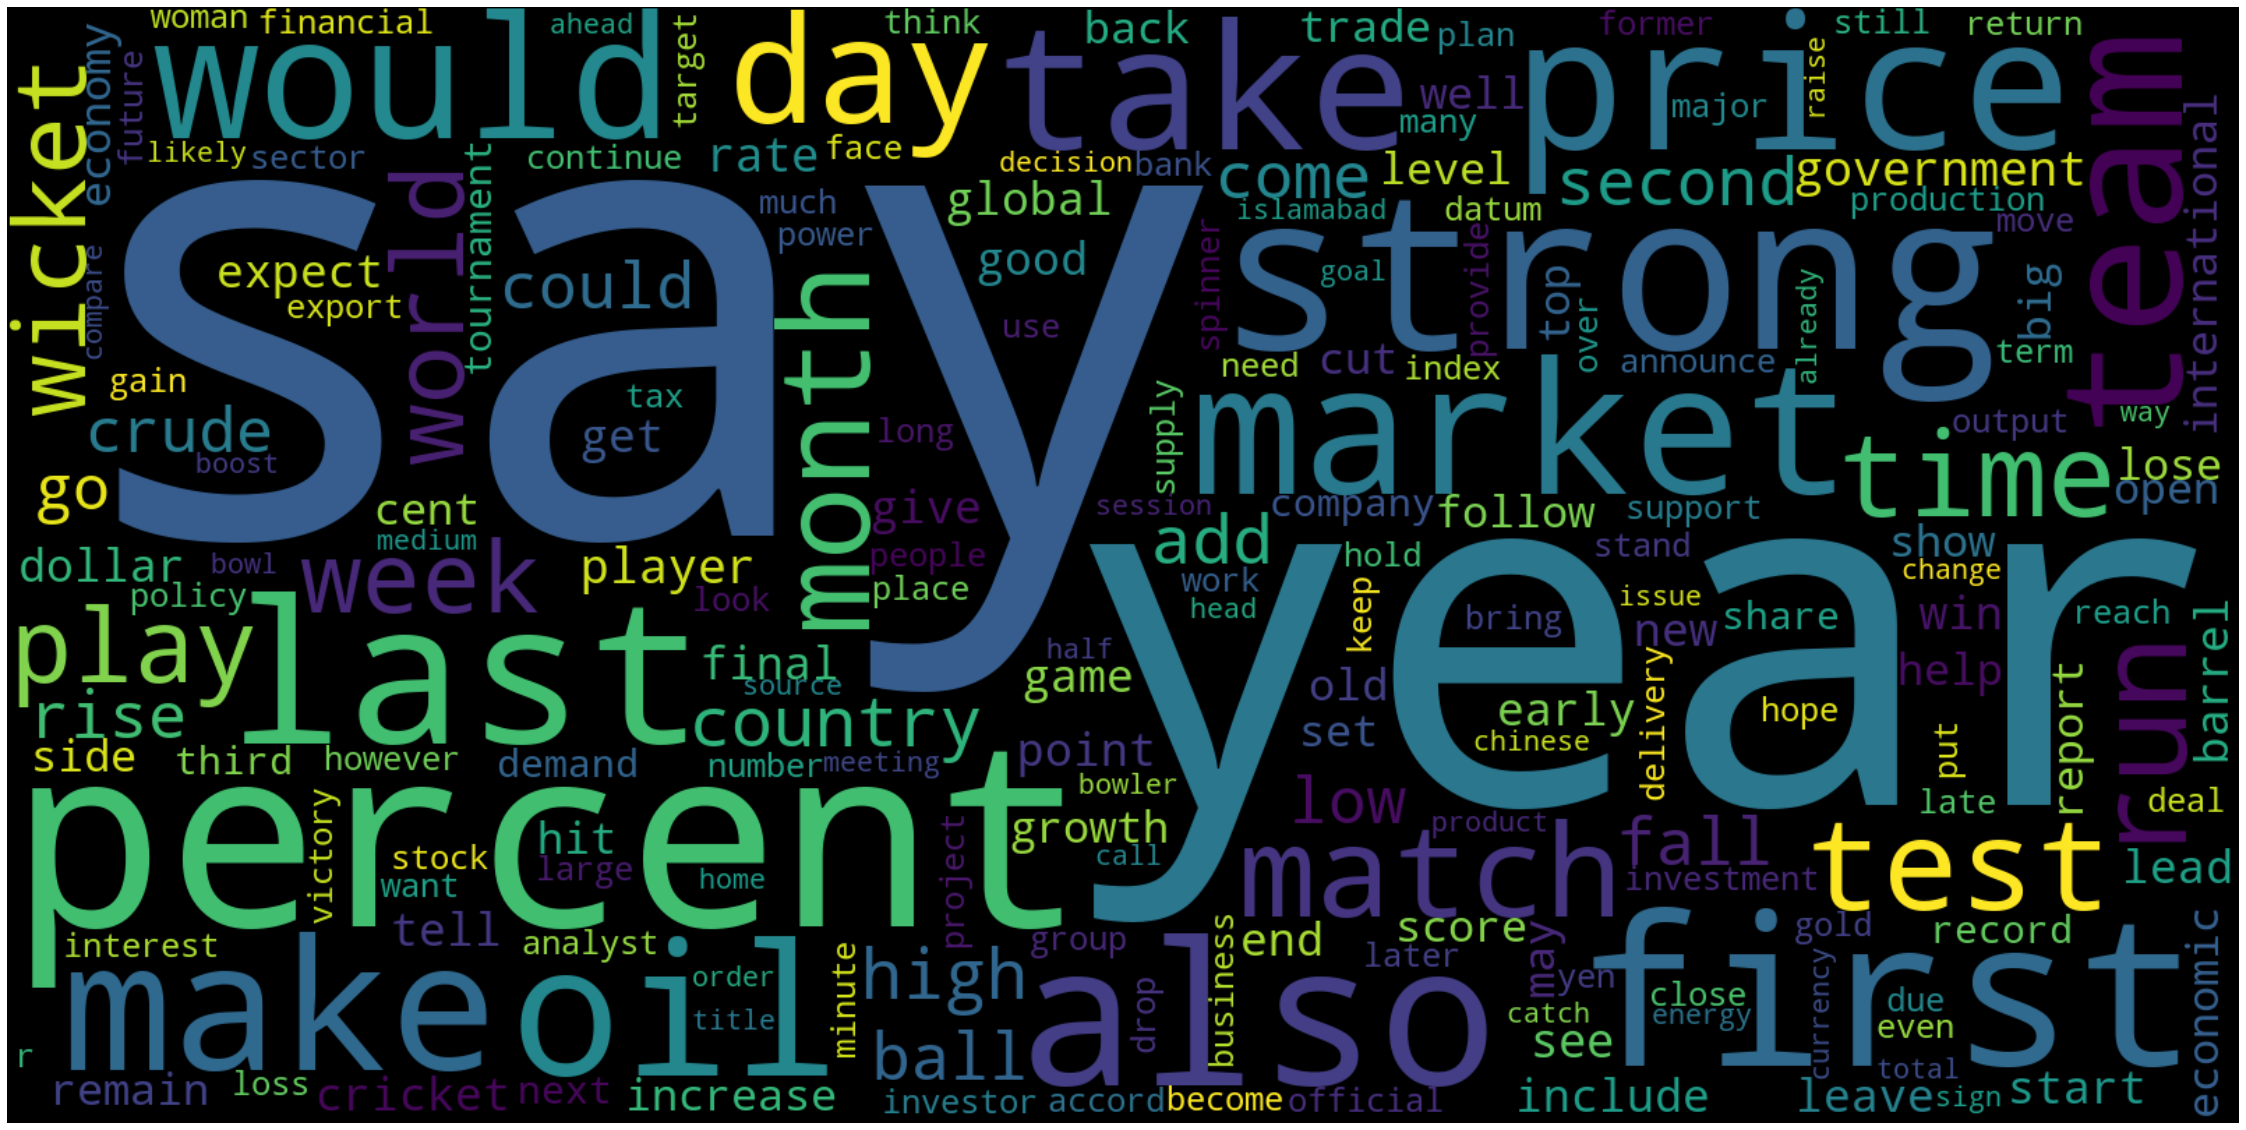

In [12]:
from collections import Counter

words = df_.token.sum()
word_freq = Counter(words)

from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width=1600, height=800)


wordcloud.generate_from_frequencies(frequencies=word_freq)

mpl.rcParams['figure.figsize']=(40.0,30.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=3000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

###From this word cloud we can see that the biggest word is "say" and "year", which is to be expected as this data is related to news articles. It appears as there are several words related to the economy (e.g. "oil", "investor", "market") as well as sports (e.g. "cricket", "score", "match").

In [13]:
# Create Dictionary
id2word = corpora.Dictionary(df_['token'])

# Create Corpus
texts = df_['token']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

display(texts)

0       [government, decide, bring, public, transport,...
1       [market, start, upswe, limited, trading, mainl...
2       [share, open, percent, low, follow, tepid, lea...
3       [tumble, follow, painful, loss, sit, year, low...
4       [oil, price, slip, barrel, first, time, year, ...
                              ...                        
2687    [flag, carrier, begin, implement, ban, laptop,...
2688    [strong, former, say, stand, test, time, count...
2689    [ground, fleet, self, drive, car, pende, inves...
2690    [strong, plan, co, finance, infrastructure, pr...
2691    [strong, base, technology, incubator, organize...
Name: token, Length: 2692, dtype: object

In [14]:
w2vmodel = Word2Vec(texts, size=16, window=5, min_count=5, workers=4)

In [15]:
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model   = TSNE(perplexity=50, n_components=2, n_iter=2500, random_state=0)
    reduced_dims = tsne_model.fit_transform(tokens)

    # get the cooridinates
    x = reduced_dims[:, 0]
    y = reduced_dims[:, 1]
    
    # note that animation_group should exist in all frames
    fig = px.scatter(
      # data_frame = df_country, 
      x= x,       
      y=y,        
      hover_name=labels,
      # log_x=True, 
      size_max=55, 
      text = labels,
      range_x=[-50, 50], 
      range_y=[-50,50],
      width = 1000,
      height = 1000,
      title= "t-SNE visualization of words", 
    )

    fig.update_traces(textposition='top center')

    fig.show()

In [16]:
tsne_plot(w2vmodel)

In [17]:
w2vmodel.wv.most_similar('oil')

[('supply', 0.9403915405273438),
 ('overhang', 0.9372905492782593),
 ('prop', 0.9303911924362183),
 ('demand', 0.9299842119216919),
 ('glut', 0.9250006675720215),
 ('seasonal', 0.9238313436508179),
 ('refinery', 0.9199192523956299),
 ('distillate', 0.9164234399795532),
 ('trader', 0.9131885766983032),
 ('exporter', 0.9099981784820557)]

In [18]:
w2vmodel.wv.most_similar('global')

[('demand', 0.9728888273239136),
 ('market', 0.9459409713745117),
 ('weak', 0.916619598865509),
 ('concern', 0.9105995893478394),
 ('glut', 0.904666006565094),
 ('continue', 0.8978618383407593),
 ('overhang', 0.8899838924407959),
 ('exporter', 0.8840623497962952),
 ('analyst', 0.8796632289886475),
 ('prop', 0.8795230984687805)]

In [19]:
w2vmodel.wv.most_similar('test')

[('match', 0.9325085878372192),
 ('series', 0.9307966232299805),
 ('night', 0.9168578386306763),
 ('host', 0.9087115526199341),
 ('side', 0.9075539112091064),
 ('indie', 0.9040613770484924),
 ('durban', 0.8974947929382324),
 ('start', 0.896370530128479),
 ('first', 0.8925060629844666),
 ('play', 0.8823617696762085)]

In [24]:
w2vmodel.wv.most_similar('investor')

[('currency', 0.90110182762146),
 ('equity', 0.8892056941986084),
 ('safe', 0.8733813762664795),
 ('buy', 0.8601188659667969),
 ('risk', 0.8552254438400269),
 ('appetite', 0.8536958694458008),
 ('much', 0.8531866073608398),
 ('emerge', 0.8525609970092773),
 ('weak', 0.8523249626159668),
 ('strategist', 0.8482671976089478)]

In [21]:
w2vmodel.wv.most_similar('government')

[('tax', 0.9535533785820007),
 ('finance', 0.9487848877906799),
 ('loan', 0.9338994026184082),
 ('waive', 0.9294761419296265),
 ('federal', 0.9274788498878479),
 ('issue', 0.9233779907226562),
 ('approve', 0.9090195894241333),
 ('interference', 0.9038877487182617),
 ('medium', 0.9035050868988037),
 ('sector', 0.8989466428756714)]

Word Pairs:
1.) Oil - Supply
2.) Global - Demand
3.) Test - Match
4.) Investor - Currency
5.) Government - Tax